<a href="https://colab.research.google.com/github/vtu23158/QML_LAB/blob/main/QML_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running without error correction...
Running with Shor error correction...

Results:
Without EC: 0 = 0.369, 1 = 0.631
With EC:    0 = 0.898, 1 = 0.102
Deviation (no EC): 26.20%
Deviation (with EC): 79.60%


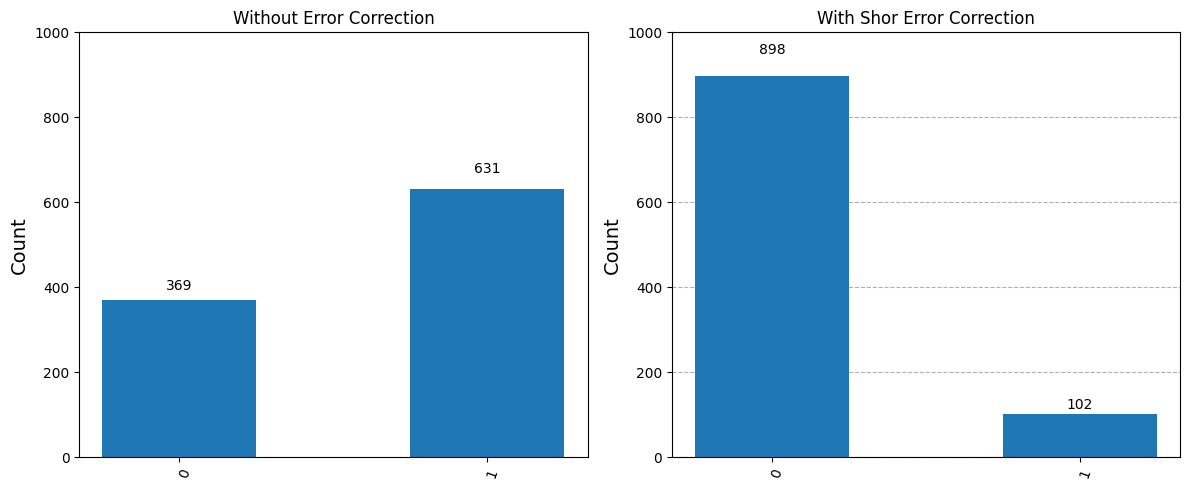


Demonstrating specific error correction...
Results with error on qubit 4: {'1': 1000}

Circuit stats:
Depth: 18
Size: 40
Width (qubits): 9
Shor Encoding Circuit:
               ┌───┐          
q_0: ──■────■──┤ H ├──■────■──
       │    │  └───┘┌─┴─┐  │  
q_1: ──┼────┼───────┤ X ├──┼──
       │    │       └───┘┌─┴─┐
q_2: ──┼────┼────────────┤ X ├
     ┌─┴─┐  │  ┌───┐     └───┘
q_3: ┤ X ├──┼──┤ H ├──■────■──
     └───┘  │  └───┘┌─┴─┐  │  
q_4: ───────┼───────┤ X ├──┼──
            │       └───┘┌─┴─┐
q_5: ───────┼────────────┤ X ├
          ┌─┴─┐┌───┐     └───┘
q_6: ─────┤ X ├┤ H ├──■────■──
          └───┘└───┘┌─┴─┐  │  
q_7: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_8: ────────────────────┤ X ├
                         └───┘

Simplified Shor QEC Circuit:
     ┌───┐          ┌───┐           ░           ┌───┐          ┌─┐
q_0: ┤ H ├──■────■──┤ H ├──■────■───░───■────■──┤ H ├──■────■──┤M├
     └───┘  │    │  └───┘┌─┴─┐  │   ░   │  ┌─┴─┐└───┘  │    │  └╥┘
q_1: ───────┼────

In [ ]:
!pip install qiskit
!pip install qiskit-aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Shor Encoding Circuit
# -----------------------------
def shor_encode():
    qc = QuantumCircuit(9, name="ShorEncode")

    # Bit-flip protection (repetition code)
    qc.cx(0, 3)
    qc.cx(0, 6)

    # Phase-flip protection (use Hadamard + repetition)
    qc.h(0)
    qc.h(3)
    qc.h(6)

    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.cx(3, 4)
    qc.cx(3, 5)
    qc.cx(6, 7)
    qc.cx(6, 8)

    return qc

# -----------------------------
# Step 2: Apply quantum gates
# -----------------------------
def apply_quantum_operations():
    qc = QuantumCircuit(9, name="QuantumOps")

    qc.h(0)
    qc.rx(0.5, 1)
    qc.ry(0.3, 2)
    qc.rz(0.7, 3)
    qc.s(4)
    qc.sdg(5)
    qc.t(6)
    qc.tdg(7)
    qc.x(8)
    qc.cx(0, 4)
    qc.cz(1, 5)
    qc.swap(2, 6)

    return qc

# -----------------------------
# Step 3: Error correction (simplified)
# -----------------------------
def apply_error_correction(syndrome="000000"):
    qc = QuantumCircuit(9, name="ErrorCorrection")

    qc.barrier()
    # Apply basic correction (dummy)
    qc.x(0)
    qc.z(0)
    qc.x(0)
    qc.z(0)

    return qc

# -----------------------------
# Step 4: Full QEC Circuit
# -----------------------------
def shor_qec_circuit():
    qc = QuantumCircuit(9, 1)

    # Prepare logical |+> = H|0>
    qc.h(0)

    # Apply quantum operations
    qc = qc.compose(apply_quantum_operations())

    # Encode
    qc = qc.compose(shor_encode())

    qc.barrier()

    # Apply simplified error correction
    qc = qc.compose(apply_error_correction())

    # Decode
    qc = qc.compose(shor_encode().inverse())

    # Measure logical qubit
    qc.measure(0, 0)

    return qc

# -----------------------------
# Step 5: Noise model
# -----------------------------
def build_noise_model():
    noise_model = NoiseModel()
    p1 = 0.01
    p2 = 0.03

    error1 = depolarizing_error(p1, 1)
    noise_model.add_all_qubit_quantum_error(error1, ['h', 'x', 'y', 'z', 's', 'sdg', 't', 'tdg', 'rx', 'ry', 'rz'])

    error2 = depolarizing_error(p2, 2)
    noise_model.add_all_qubit_quantum_error(error2, ['cx', 'cz', 'swap'])

    return noise_model

# -----------------------------
# Step 6: Run comparison
# -----------------------------
def run_comparison():
    noise_model = build_noise_model()
    backend = AerSimulator(noise_model=noise_model)

    # Circuit without error correction
    qc_no_ec = QuantumCircuit(1, 1)
    qc_no_ec.h(0)
    qc_no_ec.rx(0.5, 0)
    qc_no_ec.ry(0.3, 0)
    qc_no_ec.rz(0.7, 0)
    qc_no_ec.measure(0, 0)

    # Circuit with Shor code
    qc_with_ec = shor_qec_circuit()

    # Transpile
    transpiled_no_ec = transpile(qc_no_ec, backend)
    transpiled_with_ec = transpile(qc_with_ec, backend)

    # Run
    print("Running without error correction...")
    result_no_ec = backend.run(transpiled_no_ec, shots=1000).result()
    counts_no_ec = result_no_ec.get_counts()

    print("Running with Shor error correction...")
    result_with_ec = backend.run(transpiled_with_ec, shots=1000).result()
    counts_with_ec = result_with_ec.get_counts()

    # Probabilities
    prob_0_no_ec = counts_no_ec.get('0', 0) / 1000
    prob_1_no_ec = counts_no_ec.get('1', 0) / 1000
    prob_0_with_ec = counts_with_ec.get('0', 0) / 1000
    prob_1_with_ec = counts_with_ec.get('1', 0) / 1000

    print("\nResults:")
    print(f"Without EC: 0 = {prob_0_no_ec:.3f}, 1 = {prob_1_no_ec:.3f}")
    print(f"With EC:    0 = {prob_0_with_ec:.3f}, 1 = {prob_1_with_ec:.3f}")

    deviation_no_ec = abs(0.5 - prob_0_no_ec) * 200
    deviation_with_ec = abs(0.5 - prob_0_with_ec) * 200
    print(f"Deviation (no EC): {deviation_no_ec:.2f}%")
    print(f"Deviation (with EC): {deviation_with_ec:.2f}%")

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    plot_histogram(counts_no_ec, ax=ax1)
    ax1.set_title('Without Error Correction')
    ax1.set_ylim(0, 1000)

    plot_histogram(counts_with_ec, ax=ax2)
    ax2.set_title('With Shor Error Correction')
    ax2.set_ylim(0, 1000)

    plt.tight_layout()
    plt.savefig('shor_code_comparison.png', dpi=300)
    plt.show()

    return counts_no_ec, counts_with_ec

# -----------------------------
# Step 7: Demonstration of bit-flip correction
# -----------------------------
def demonstrate_error_correction():
    print("\nDemonstrating specific error correction...")

    qc = QuantumCircuit(9, 1)

    # Prepare |1⟩ state
    qc.x(0)

    # Encode
    qc = qc.compose(shor_encode())

    # Introduce bit-flip error on qubit 4
    qc.x(4)

    # Decode
    qc = qc.compose(shor_encode().inverse())

    # Measure
    qc.measure(0, 0)

    backend = AerSimulator()
    transpiled = transpile(qc, backend)
    result = backend.run(transpiled, shots=1000).result()
    counts = result.get_counts()

    print(f"Results with error on qubit 4: {counts}")
    return counts

# -----------------------------
# Step 8: Visualize circuits
# -----------------------------
def visualize_circuits():
    print("Shor Encoding Circuit:")
    print(shor_encode().draw(output='text'))

    simple_qec = QuantumCircuit(9, 1)
    simple_qec.h(0)
    simple_qec = simple_qec.compose(shor_encode())
    simple_qec.barrier()
    simple_qec = simple_qec.compose(shor_encode().inverse())
    simple_qec.measure(0, 0)

    print("\nSimplified Shor QEC Circuit:")
    print(simple_qec.draw(output='text'))

# -----------------------------
# Main
# -----------------------------
if __name__ == "__main__":
    counts_no_ec, counts_with_ec = run_comparison()
    error_counts = demonstrate_error_correction()

    qc = shor_qec_circuit()
    print("\nCircuit stats:")
    print("Depth:", qc.depth())
    print("Size:", qc.size())
    print("Width (qubits):", qc.num_qubits)

    visualize_circuits()


In [ ]:
# Install needed packages (run these in your environment, not inside the script)
# !pip install qiskit qiskit-optimization torch networkx numpy
# !pip install qiskit-aer
# !pip install pylatexenc
!pip install qiskit qiskit-optimization torch networkx numpy qiskit-aer pylatexenc matplotlib


import os
import numpy as np
import networkx as nx
import torch
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
# Visualization imports
import matplotlib
matplotlib.use(os.environ.get("MPLBACKEND", "Agg"))
import matplotlib.pyplot as plt

# -------------------------
# Problem definition
# -------------------------
def make_graph():
    # Example: 4-node graph (same as Qiskit tutorial)
    w = np.array([
        [0.0, 1.0, 1.0, 0.0],
        [1.0, 0.0, 1.0, 1.0],
        [1.0, 1.0, 0.0, 1.0],
        [0.0, 1.0, 1.0, 0.0]
    ])
    G = nx.from_numpy_array(w)
    return G, w

# computes classical objective (cut value) for bitstring x (array of 0/1)
def objective_value(x, w):
    X = np.outer(x, (1 - x))
    w_01 = np.where(w != 0, 1, 0)
    return np.sum(w_01 * X)

# brute-force best solution (for comparison)
def brute_force_maxcut(w):
    n = w.shape[0]
    best = -1
    best_x = None
    for i in range(2**n):
        x = np.array(list(map(int, np.binary_repr(i, width=n))))
        val = objective_value(x, w)
        if val > best:
            best = val
            best_x = x
    return best_x, best

# -------------------------
# Build QAOA circuit (manual)
# -------------------------
def qaoa_circuit(n_qubits, edges, gammas, betas):
    """
    Build QAOA circuit:
    - start in |+>^n
    - for each layer l:
        cost unitary U_C(gamma_l) = exp(-i * gamma_l * C)
        mixer U_B(beta_l) = product Rx(2*beta_l)
    edges: list of tuples (i, j, weight)
    gammas, betas: lists or 1D arrays (length p)
    """
    p = len(gammas)
    qc = QuantumCircuit(n_qubits)
    # initial layer: Hadamards to create |+>^n
    qc.h(range(n_qubits))
    for layer in range(p):
        gamma = float(gammas[layer])
        # cost layer: implement exp(-i * gamma * w_ij * Z_i Z_j)
        for (i, j, w) in edges:
            if w == 0:
                continue
            # For ZZ interaction exp(-i * theta/2 * Z_i Z_j) ->
            # use CNOT-RZ-CNOT with theta = 2*gamma*w
            theta = 2.0 * gamma * w
            qc.cx(i, j)
            qc.rz(theta, j)
            qc.cx(i, j)
        # mixer layer: RX(2*beta)
        beta = float(betas[layer])
        for q in range(n_qubits):
            qc.rx(2.0 * beta, q)
    return qc

# -------------------------
# Expectation value from statevector
# -------------------------
def expectation_from_statevector(statevector, w):
    """Given a statevector and adjacency matrix w, compute expected MaxCut objective."""
    n = w.shape[0]
    probs = Statevector(statevector).probabilities_dict()
    exp_val = 0.0
    for bitstr, p in probs.items():
        # reverse so index 0 => qubit 0
        bits = np.array([int(b) for b in bitstr[::-1]])
        exp_val += objective_value(bits, w) * p
    return exp_val

# -------------------------
# QAOA + PyTorch classical loop
# -------------------------
def _qaoa_expectation_with_params(flat_params, n, edges, backend, w, p):
    """Helper to evaluate expected cut quickly for given params (no PyTorch)"""
    gammas = flat_params[:p]
    betas = flat_params[p:]
    qc = qaoa_circuit(n, edges, gammas, betas)
    qc.save_statevector()
    res = backend.run(qc).result()
    sv = res.get_statevector(qc)
    exp_val = expectation_from_statevector(sv, w)
    return exp_val

def run_qaoa_with_pytorch(w, p=1, init_std=0.5, maxiter=100,
                         lr=0.1, finite_diff_eps=1e-3,
                         backend_name="aer_simulator_statevector"):
    n = w.shape[0]
    # edges list with weights (i>j to match earlier convention)
    edges = [(i, j, w[i, j]) for i in range(n) for j in range(i) if w[i, j] != 0]
    # initial params (gamma_1..gamma_p, beta_1..beta_p)
    params = torch.randn(2 * p, dtype=torch.double) * init_std
    params.requires_grad = False  # we will supply grads manually using finite differences
    optimizer = torch.optim.Adam([params], lr=lr)
    backend = Aer.get_backend(backend_name)
    best = {"val": -np.inf, "params": None, "bitstring": None}

    for it in range(maxiter):
        # unpack
        gammas = params.detach().numpy()[:p]
        betas = params.detach().numpy()[p:]
        # build circuit, get statevector
        qc = qaoa_circuit(n, edges, gammas, betas)
        qc.save_statevector()
        # using Aer simulator
        res = backend.run(qc).result()
        sv = res.get_statevector(qc)
        # compute expectation (we maximize expected cut)
        exp_val = expectation_from_statevector(sv, w)
        loss = -float(exp_val)  # minimize negative of expectation

        # keep best
        if exp_val > best["val"]:
            # extract most likely bitstring
            probs = Statevector(sv).probabilities_dict()
            most = max(probs.items(), key=lambda kv: kv[1])[0]
            bits = np.array([int(b) for b in most[::-1]])
            best.update({"val": exp_val, "params": params.detach().clone(), "bitstring": bits})

        # finite-difference gradient (central difference)
        grads = np.zeros_like(params.detach().numpy())
        base = params.detach().numpy()
        eps = finite_diff_eps
        for k in range(len(base)):
            plus = base.copy()
            minus = base.copy()
            plus[k] += eps
            minus[k] -= eps
            g_plus = _qaoa_expectation_with_params(plus, n, edges, backend, w, p)
            g_minus = _qaoa_expectation_with_params(minus, n, edges, backend, w, p)
            grad_k = (-(g_plus - g_minus) / (2 * eps))  # derivative of loss = -expectation
            grads[k] = grad_k

        # set grads into params manually and step optimizer
        params_grad = torch.from_numpy(grads).to(dtype=torch.double)
        params.grad = params_grad
        optimizer.step()
        optimizer.zero_grad()

        if it % 10 == 0 or it == maxiter - 1:
            print(f"Iter {it:03d}: expected cut = {exp_val:.6f}, loss = {loss:.6f}")

    return best

# -------------------------
# Circuit display helpers
# -------------------------
def show_circuit(qc: QuantumCircuit, filename: str = None, style: str = "mpl"):
    print("\n--- Quantum Circuit ---")
    try:
        print(qc.draw(output="text"))
    except Exception as e:
        print("Failed to draw Quantum Circuit:", e)
    if style == "mpl":
        try:
            fig = qc.draw(output="mpl", interactive=False)
            fig.tight_layout()
            if filename:
                fig.savefig(filename, dpi=200, bbox_inches="tight")
                print(f"[Saved circuit figure to {filename}]")
            else:
                tempname = "qaoa_circuit.png"
                fig.savefig(tempname, dpi=200, bbox_inches="tight")
                print(f"[Saved circuit figure to {tempname}]")
            plt.close(fig)
        except Exception as e:
            print("Matplotlib drawing failed:", str(e))
            print("Fallback: Quantum Circuit diagram above.")

def demo_display_initial_circuit(w, p=1, filename="qaoa_initial_circuit.png"):
    n = w.shape[0]
    # random params for demo
    gammas = np.random.randn(p) * 0.8
    betas = np.random.randn(p) * 0.8
    edges = [(i, j, w[i, j]) for i in range(n) for j in range(i) if w[i, j] != 0]
    qc = qaoa_circuit(n, edges, gammas, betas)
    show_circuit(qc, filename=filename, style="mpl")

def demo_display_best_circuit(w, best_params, p=1, filename="qaoa_best_circuit.png"):
    n = w.shape[0]
    if isinstance(best_params, torch.Tensor):
        flat = best_params.detach().cpu().numpy()
    else:
        flat = np.array(best_params)
    gammas = flat[:p]
    betas = flat[p:]
    edges = [(i, j, w[i, j]) for i in range(n) for j in range(i) if w[i, j] != 0]
    qc = qaoa_circuit(n, edges, gammas, betas)
    show_circuit(qc, filename=filename, style="mpl")

# -------------------------
# Run example
# -------------------------
if __name__ == "__main__":
    G, w = make_graph()
    print("Graph edges:", list(G.edges()))
    bf_x, bf_val = brute_force_maxcut(w)
    print("Brute-force best:", bf_x, "value:", bf_val)

    # show an initial example circuit (random parameters)
    demo_display_initial_circuit(w, p=1, filename="qaoa_initial_circuit.png")

    # run QAOA p=1 (toy)
    best = run_qaoa_with_pytorch(w, p=1, init_std=0.8, maxiter=80, lr=0.2, finite_diff_eps=1e-3)
    print("QAOA best expected value:", best["val"])
    print("Most-likely bitstring found:", best["bitstring"])

    # evaluate most-likely bitstring exactly
    exact_val = objective_value(best["bitstring"], w)
    print("Exact value of that bitstring:", exact_val)

    # Display the optimized circuit using the best parameters (and save)
    if best["params"] is not None:
        demo_display_best_circuit(w, best["params"], p=1, filename="qaoa_best_circuit.png")
    else:
        print("No best params found to display.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.5/646.5 kB 40.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.1/237.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=be4b7292f54e1f76059da520f1394f0ce8f32a9f97db857faa79e5cc98150ef9
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae9

In [ ]:
!pip install qiskit
!pip insiall qiskit-aer
import numpy as np
from math import log2, sqrt

print("\n" + "="*50)
print("TASK 3: BELL STATES AND ENTANGLEMENT ENTROPY")
print("="*50)

# Define quantum gates
H = 1/sqrt(2) * np.array([[1, 1], [1, -1]])  # Hadamard gate
I = np.eye(2)  # Identity gate
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])  # CNOT gate


class BellStates:
    @staticmethod
    def phi_plus():
        """Construct |Φ⁺⟩ = (|00⟩ + |11⟩)/√2"""
        state = np.kron([1, 0], [1, 0])  # |00⟩
        state = np.kron(H, I) @ state  # Apply H to first qubit
        return CNOT @ state  # Apply CNOT

    @staticmethod
    def phi_minus():
        """Construct |Φ⁻⟩ = (|00⟩ - |11⟩)/√2"""
        phi_p = BellStates.phi_plus()
        phi_m = phi_p.copy()
        phi_m[3] *= -1  # flip sign of |11⟩ component
        return phi_m

    @staticmethod
    def psi_plus():
        """Construct |Ψ⁺⟩ = (|01⟩ + |10⟩)/√2"""
        state = np.kron([1, 0], [0, 1])  # |01⟩
        state = np.kron(H, I) @ state
        return CNOT @ state

    @staticmethod
    def psi_minus():
        """Construct |Ψ⁻⟩ = (|01⟩ - |10⟩)/√2"""
        psi_p = BellStates.psi_plus()
        psi_m = psi_p.copy()
        psi_m[2] *= -1  # flip sign of |10⟩ component
        return psi_m


def partial_trace(rho, dims, axis=0):
    """
    Compute partial trace of density matrix rho.
    dims: list of dimensions of each subsystem [dA, dB]
    axis: 0 for tracing out B, 1 for tracing out A
    """
    dA, dB = dims
    if axis == 0:  # Trace out B
        rho_reduced = np.zeros((dA, dA), dtype=complex)
        for i in range(dA):
            for j in range(dA):
                for k in range(dB):
                    rho_reduced[i, j] += rho[i * dB + k, j * dB + k]
    else:  # Trace out A
        rho_reduced = np.zeros((dB, dB), dtype=complex)
        for i in range(dB):
            for j in range(dB):
                for k in range(dA):
                    rho_reduced[i, j] += rho[k * dB + i, k * dB + j]
    return rho_reduced


def entanglement_entropy(state):
    """
    Calculate entanglement entropy of bipartite state.
    Input: state vector or density matrix
    Output: entanglement entropy
    """
    # Convert state to density matrix if it's a state vector
    if state.ndim == 1:
        rho = np.outer(state, state.conj())
    else:
        rho = state

    # Partial trace over subsystem B (assuming 2-qubit system)
    rho_A = partial_trace(rho, [2, 2], axis=1)

    # Compute eigenvalues (using eigh for Hermitian matrices)
    eigvals = np.linalg.eigvalsh(rho_A)

    # Calculate von Neumann entropy
    entropy = 0.0
    for lamda in eigvals:
        if lamda > 1e-10:  # avoid log(0)
            entropy -= lamda * log2(lamda)

    return entropy


# Example usage
if __name__ == "__main__":
    # Construct Bell states
    phi_p = BellStates.phi_plus()
    phi_m = BellStates.phi_minus()
    psi_p = BellStates.psi_plus()
    psi_m = BellStates.psi_minus()

    print(f"Bell state |Φ⁺⟩ =", phi_p)
    print(f"Bell state |Φ⁻⟩ =", phi_m)
    print(f"Bell state |Ψ⁺⟩ =", psi_p)
    print(f"Bell state |Ψ⁻⟩ =", psi_m)

    # Verify entanglement entropy (should be 1 for maximally entangled states)
    print(f"Entanglement entropy of |Φ⁺⟩: {entanglement_entropy(phi_p):.4f}")
    print(f"Entanglement entropy of |Φ⁻⟩: {entanglement_entropy(phi_m):.4f}")
    print(f"Entanglement entropy of |Ψ⁺⟩: {entanglement_entropy(psi_p):.4f}")
    print(f"Entanglement entropy of |Ψ⁻⟩: {entanglement_entropy(psi_m):.4f}")

    # Verify product state has zero entanglement entropy
    product_state = np.kron([1, 0], [1, 0])  # |00⟩
    print(f"Entanglement entropy of |00⟩: {entanglement_entropy(product_state):.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
ERROR: unknown command "insiall" - maybe you meant "install"

TASK 3: BELL STATES AND ENTANGLEMENT ENTROPY
Bell state |Φ⁺⟩ = [0.70710678 0.         0.         0.70710678]
Bell state |Φ⁻⟩ = [ 0.70710678  0.          0.         -0.70710678]
Bell state |Ψ⁺⟩ = [0.         0.70710678 0.70710678 0.        ]
Bell state |Ψ⁻⟩ = [ 0.          0.70710678 -0.70710678  0.        ]
Entanglement entropy of |Φ⁺⟩: 1.0000
Entanglement entropy of |Φ⁻⟩: 1.0000
Entanglement entropy of |Ψ⁺⟩: 1.0000
Entanglement entropy of |Ψ⁻⟩: 1.0000
Entanglement entropy of |00⟩: 0.0000


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 94.3 MB/s eta 0:00:00
MATHEMATICAL MODEL
For function f: {00, 01, 10, 11} → {0,1}:
- Constant: f(x) = 0 or 1 for all inputs
- Balanced: f(x) = 0 for half inputs, 1 for other half

Deutsch-Jozsa Process:
1. |ψ₀⟩ = |00⟩|1⟩
2. Apply Hadamar

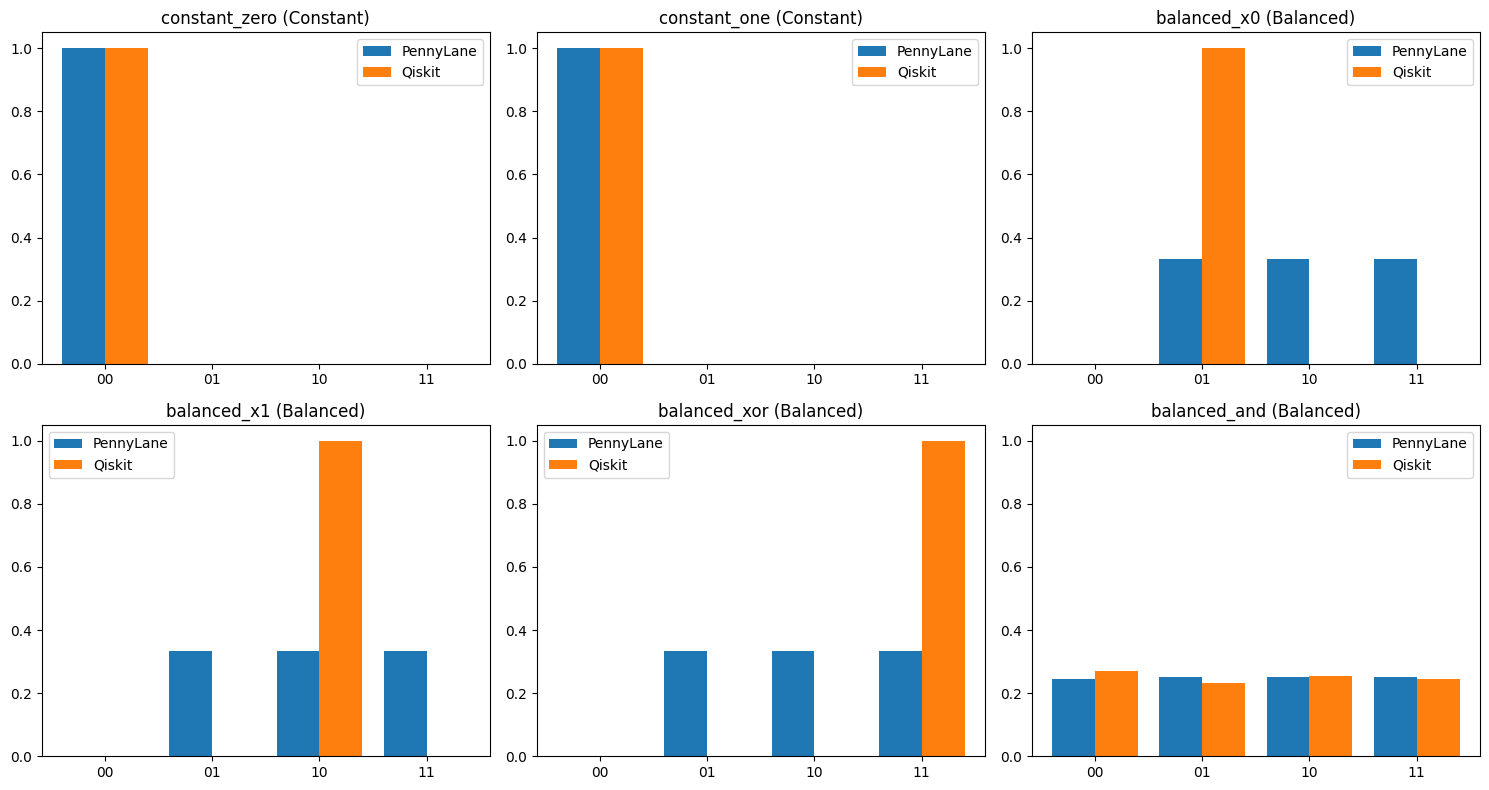


FINAL SUMMARY
Accuracy: 6/6 (100.0%)
constant_zero   → Classical=Constant, PennyLane=Constant, Qiskit=Constant
constant_one    → Classical=Constant, PennyLane=Constant, Qiskit=Constant
balanced_x0     → Classical=Balanced, PennyLane=Balanced, Qiskit=Balanced
balanced_x1     → Classical=Balanced, PennyLane=Balanced, Qiskit=Balanced
balanced_xor    → Classical=Balanced, PennyLane=Balanced, Qiskit=Balanced
balanced_and    → Classical=Balanced, PennyLane=Balanced, Qiskit=Balanced


In [ ]:
# ================= INSTALL REQUIRED PACKAGES =================
!pip install pennylane qiskit qiskit-aer matplotlib numpy --quiet
# ================= IMPORTS =================
import pennylane as qml
from pennylane import numpy as pnp
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
# ================= MATHEMATICAL MODEL (INFO) =================
print("MATHEMATICAL MODEL")
print("=" * 50)
print("For function f: {00, 01, 10, 11} → {0,1}:")
print("- Constant: f(x) = 0 or 1 for all inputs")
print("- Balanced: f(x) = 0 for half inputs, 1 for other half")
print("\nDeutsch-Jozsa Process:")
print("1. |ψ₀⟩ = |00⟩|1⟩")
print("2. Apply Hadamard → superposition")
print("3. Apply oracle U_f")
print("4. Apply Hadamard to first 2 qubits")
print("5. Measure → |00⟩ if constant, else balanced")
# ================= CLASSICAL TRUTH TABLE =================
def classical_truth_table(oracle_type):
    if oracle_type == 'constant_zero':
        return {'00': 0, '01': 0, '10': 0, '11': 0}
    elif oracle_type == 'constant_one':
        return {'00': 1, '01': 1, '10': 1, '11': 1}
    elif oracle_type == 'balanced_x0':
        return {'00': 0, '01': 0, '10': 1, '11': 1}
    elif oracle_type == 'balanced_x1':
        return {'00': 0, '01': 1, '10': 0, '11': 1}
    elif oracle_type == 'balanced_xor':
        return {'00': 0, '01': 1, '10': 1, '11': 0}
    elif oracle_type == 'balanced_and':
        return {'00': 0, '01': 0, '10': 0, '11': 1}

oracle_types = [
    'constant_zero', 'constant_one',
    'balanced_x0', 'balanced_x1',
    'balanced_xor', 'balanced_and'
]
# ================= PENNYLANE ORACLES =================
def constant_zero_oracle(): pass
def constant_one_oracle(): qml.PauliX(wires=2)
def balanced_x0_oracle(): qml.CNOT(wires=[0, 2])
def balanced_x1_oracle(): qml.CNOT(wires=[1, 2])
def balanced_xor_oracle():
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[1, 2])
def balanced_and_oracle(): qml.Toffoli(wires=[0, 1, 2])

pennyLane_oracles = {
    'constant_zero': constant_zero_oracle,
    'constant_one': constant_one_oracle,
    'balanced_x0': balanced_x0_oracle,
    'balanced_x1': balanced_x1_oracle,
    'balanced_xor': balanced_xor_oracle,
    'balanced_and': balanced_and_oracle
}
# ================= PENNYLANE CIRCUIT =================
dev = qml.device('default.qubit', wires=3, shots=1000)

@qml.qnode(dev)
def deutsch_jozsa_circuit(oracle_func):
    qml.PauliX(wires=2)  # set ancilla to |1>
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    oracle_func()
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.probs(wires=[0, 1])
# ================= QISKIT IMPLEMENTATION =================
def create_dj_circuit_qiskit(oracle_type):
    qc = QuantumCircuit(3, 2)
    qc.x(2)
    qc.h([0, 1, 2])
    if oracle_type == 'constant_zero': pass
    elif oracle_type == 'constant_one': qc.x(2)
    elif oracle_type == 'balanced_x0': qc.cx(0, 2)
    elif oracle_type == 'balanced_x1': qc.cx(1, 2)
    elif oracle_type == 'balanced_xor':
        qc.cx(0, 2)
        qc.cx(1, 2)
    elif oracle_type == 'balanced_and': qc.ccx(0, 1, 2)
    qc.h([0, 1])
    qc.measure(0, 0)
    qc.measure(1, 1)
    return qc

def run_qiskit_circuit(oracle_type, shots=1000):
    qc = create_dj_circuit_qiskit(oracle_type)
    sim = Aer.get_backend('qasm_simulator')
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=shots).result()
    return result.get_counts(), qc
# ================= RUN BOTH FRAMEWORKS =================
results = []
for oracle_type in oracle_types:
    print(f"\nTesting {oracle_type}")
    print("Truth table:", classical_truth_table(oracle_type))
    # PennyLane
    probs = deutsch_jozsa_circuit(pennyLane_oracles[oracle_type])
    is_const_pl = probs[0] > 0.9
    # Qiskit
    counts, _ = run_qiskit_circuit(oracle_type)
    is_const_qk = counts.get('00', 0) / 1000 > 0.9
    results.append({
        'oracle': oracle_type,
        'classical_type': 'Constant' if all(v == list(classical_truth_table(oracle_type).values())[0] for v in classical_truth_table(oracle_type).values()) else 'Balanced',
        'pennyLane_result': 'Constant' if is_const_pl else 'Balanced',
        'qiskit_result': 'Constant' if is_const_qk else 'Balanced',
        'pennyLane_p00': probs[0],
        'qiskit_counts': counts
    })
    print(f"PennyLane → {'Constant' if is_const_pl else 'Balanced'} (P(|00>)={probs[0]:.2f})")
    print(f"Qiskit → {'Constant' if is_const_qk else 'Balanced'} (counts={counts})")
# ================= VISUALIZE RESULTS =================
states = ['00', '01', '10', '11']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, result in enumerate(results):
    pl_p00 = result['pennyLane_p00']
    pl_probs = [pl_p00, (1-pl_p00)/3, (1-pl_p00)/3, (1-pl_p00)/3]
    qk_probs = [result['qiskit_counts'].get(s, 0)/1000 for s in states]
    x = np.arange(len(states))
    axes[i].bar(x-0.2, pl_probs, 0.4, label='PennyLane')
    axes[i].bar(x+0.2, qk_probs, 0.4, label='Qiskit')
    axes[i].set_title(f"{result['oracle']} ({result['classical_type']})")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(states)
    axes[i].set_ylim(0, 1.05)
    axes[i].legend()
plt.tight_layout()
plt.show()
# ================= CONCLUSION =================
print("\nFINAL SUMMARY")
correct = sum(1 for r in results if r['pennyLane_result']==r['classical_type'] and r['qiskit_result']==r['classical_type'])
print(f"Accuracy: {correct}/{len(results)} ({100*correct/len(results):.1f}%)")
for r in results:
    print(f"{r['oracle']:15} → Classical={r['classical_type']}, PennyLane={r['pennyLane_result']}, Qiskit={r['qiskit_result']}")+++++++++++


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 85.4 MB/s eta 0:00:00
Circuit diagram:
(0, 0): ───H───────@───H───X───────────@───X───H───────────@───H───X───────────@───X───H───────M('result')───
                   │                   │                   │                   │               │
(0, 1): ───H───X───@───X───H───X───────@───X───H───X───────@───X───H───X───────@───X───H───────M─────────────
                   │                   │                   │                   │               │
(0, 2): ───H───H───X───H───H───X───H───X───H───X───H───H───X───H───H───X───H───X───H───X───H───M─────────────

Measurement results for target |101>:

State |000>: 5 times (0.5

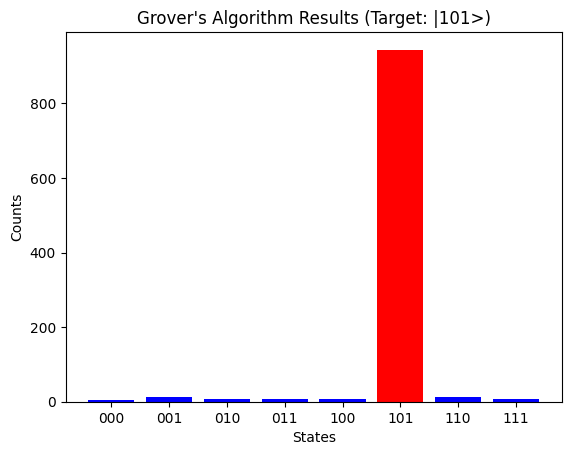

In [ ]:
# Install Cirq if not already installed
!pip install cirq

import cirq
import numpy as np
import matplotlib.pyplot as plt

def grover_3_qubit(target_binary):
    qubits = [cirq.GridQubit(0, i) for i in range(3)]
    circuit = cirq.Circuit()

    # Step 1: Initialize all qubits in superposition
    circuit.append(cirq.H.on_each(*qubits))

    # Step 2: Number of Grover iterations (optimal ~√N)
    N = 2 ** 3
    iterations = int(np.floor(np.pi/4 * np.sqrt(N)))

    for _ in range(iterations):
        apply_oracle(circuit, qubits, target_binary)
        apply_diffusion(circuit, qubits)

    # Step 3: Measurement
    circuit.append(cirq.measure(*qubits, key='result'))

    return circuit, qubits

def apply_oracle(circuit, qubits, target_binary):
    # Apply X gates where target bit is 0
    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))

    # Multi-controlled Z using H and Toffoli
    circuit.append(cirq.H(qubits[2]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[2]))

    # Undo X gates
    for i, bit in enumerate(target_binary):
        if bit == '0':
            circuit.append(cirq.X(qubits[i]))

def apply_diffusion(circuit, qubits):
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))

    circuit.append(cirq.H(qubits[2]))
    circuit.append(cirq.CCX(qubits[0], qubits[1], qubits[2]))
    circuit.append(cirq.H(qubits[2]))

    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))

def analyze_results(counts, target):
    total = sum(counts.values())
    success = counts.get(int(target, 2), 0)
    success_rate = success / total * 100

    print(f"\nMeasurement results for target |{target}>:\n")
    for state in range(8):
        bitstr = format(state, '03b')
        count = counts.get(state, 0)
        pct = count / total * 100
        marker = "<-- Target" if bitstr == target else ""
        print(f"State |{bitstr}>: {count} times ({pct:.2f}%) {marker}")

    print(f"\nSuccess rate: {success_rate:.2f}% (expected ~94% after 2 iterations)")

    states = [format(i, '03b') for i in range(8)]
    values = [counts.get(i, 0) for i in range(8)]
    colors = ['red' if s == target else 'blue' for s in states]

    plt.bar(states, values, color=colors)
    plt.title(f"Grover's Algorithm Results (Target: |{target}>)")
    plt.xlabel("States")
    plt.ylabel("Counts")
    plt.show()

if __name__ == "__main__":
    target = "101"  # Binary string of the target state
    circuit, qubits = grover_3_qubit(target)

    print("Circuit diagram:")
    print(circuit)

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=1000)
    counts = result.histogram(key='result')
    analyze_results(counts, target)



--- Feature Map Circuit (text) ---
0: ──H──RZ(6.30)─╭●────────────╭●───────────────────────────────────┤  State
1: ──H──RZ(3.40)─╰X──RZ(21.42)─╰X─╭●────────────╭●──────────────────┤  State
2: ──H──RZ(5.60)──────────────────╰X──RZ(19.04)─╰X─╭●────────────╭●─┤  State
3: ──H──RZ(2.40)───────────────────────────────────╰X──RZ(13.44)─╰X─┤  State

--- Kernel Circuit (text) ---
0: ──H──RZ(6.30)─╭●────────────╭●───────────────────────────────────────────────────── ···
1: ──H──RZ(3.40)─╰X──RZ(21.42)─╰X─╭●────────────╭●──────────────────────────────────── ···
2: ──H──RZ(5.60)──────────────────╰X──RZ(19.04)─╰X─╭●────────────╭●─╭X†────────────╭X† ···
3: ──H──RZ(2.40)───────────────────────────────────╰X──RZ(13.44)─╰X─╰X†──RZ(0.42)†─╰X† ···

0: ··· ───────────────────────────╭X†────────────────────╭X†──RZ(5.10)†──H†─┤ ╭Probs
1: ··· ─╭X†───────────────────╭X†─╰X†─────────RZ(17.85)†─╰X†──RZ(3.50)†──H†─┤ ├Probs
2: ··· ─╰X†─────────RZ(4.90)†─╰X†──RZ(1.40)†──H†────────────────────────────┤ ├Probs
3: ··

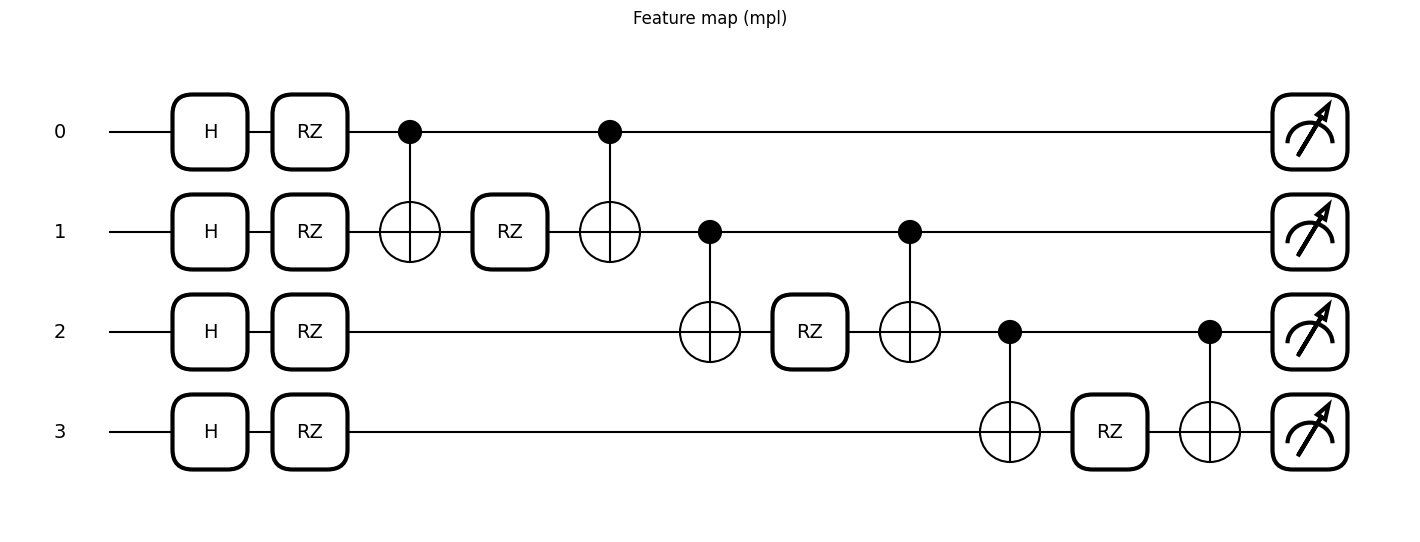

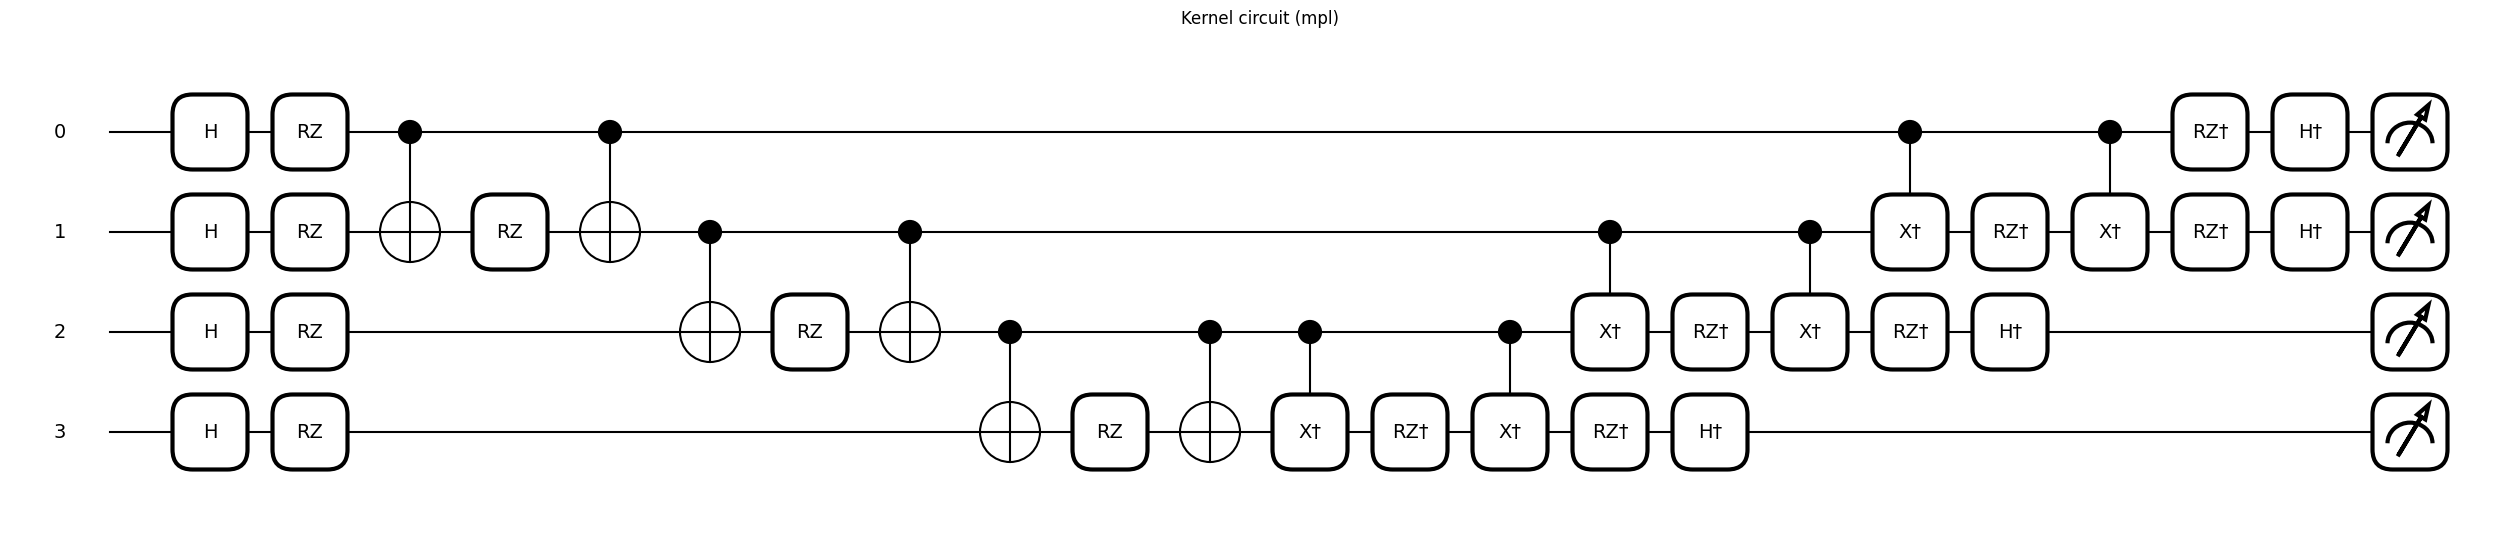

Computing kernel matrices (this may take a bit)...

Confusion Matrix
[[15  0  1]
 [ 0 15  2]
 [ 0  1 16]]

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        16
  versicolor       0.94      0.88      0.91        17
   virginica       0.84      0.94      0.89        17

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.93      0.92      0.92        50


Predicted flower type for (4.4, 4.4, 4.4, 4.4): virginica


In [ ]:
# If you want to install libraries in Colab uncomment these lines:
!pip install pennylane scikit-learn

import pennylane as qml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# -------------------------------
# Load Iris dataset (try csv first, fall back to sklearn)
# -------------------------------
try:
    df_iris = pd.read_csv("iris.csv")
    # adjust column names if the CSV uses different names
    X = df_iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
    y = df_iris['variety'].values
    # If y are strings, convert to integer labels
    from sklearn.preprocessing import LabelEncoder
    enc = LabelEncoder()
    y = enc.fit_transform(y)
    target_names = enc.classes_
except Exception:
    data = load_iris()
    X = data.data
    y = data.target
    target_names = data.target_names

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# -------------------------------
# Quantum setup
# -------------------------------
n_qubits = X.shape[1]  # 4 for iris
dev = qml.device("default.qubit", wires=n_qubits)

def feature_map(x):
    """Embedding classical features into quantum states."""
    # normalize/scale angles if you like; here we use raw features as rotation angles
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        qml.RZ(x[i], wires=i)

    # Add pairwise entanglement (a simple ZZ-like entangling block)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])
        qml.RZ(x[i] * x[i+1], wires=i+1)
        qml.CNOT(wires=[i, i+1])

@qml.qnode(dev)
def kernel_circuit(x1, x2):
    """Prepare |Φ(x1)>, apply adjoint(|Φ(x2)>) and return probabilities.
       Probability of all-zeros state equals the fidelity between the two states."""
    feature_map(x1)
    qml.adjoint(feature_map)(x2)
    return qml.probs(wires=range(n_qubits))

# A QNode to just draw the feature map (returns state for visualization)
@qml.qnode(dev)
def feature_map_state(x):
    feature_map(x)
    return qml.state()

# -------------------------------
# (Optional) Draw circuits (text) and show matplotlib circuit images
# -------------------------------
sample_x = x_train[0]
sample_y = x_train[1]

print("\n--- Feature Map Circuit (text) ---")
print(qml.draw(feature_map_state)(sample_x))

print("\n--- Kernel Circuit (text) ---")
print(qml.draw(kernel_circuit)(sample_x, sample_y))

# Matplotlib drawings (Colab inline)
try:
    fig, ax = qml.draw_mpl(feature_map_state)(sample_x)
    plt.title("Feature map (mpl)")
    plt.show()
    fig2, ax2 = qml.draw_mpl(kernel_circuit)(sample_x, sample_y)
    plt.title("Kernel circuit (mpl)")
    plt.show()
except Exception:
    # drawing may not work for some backends; ignore silently
    pass

# -------------------------------
# Construct Gram (Kernel) Matrices
# -------------------------------
def kernel(x1, x2):
    """Return fidelity between |Φ(x1)> and |Φ(x2)>.
       We use the probability of measuring all zeros after applying
       |Φ(x1)> then adjoint(|Φ(x2)>)."""
    probs = kernel_circuit(x1, x2)
    # probability of all zeros corresponds to index 0
    return float(probs[0])

def compute_kernel_matrix(X1, X2):
    K = np.zeros((len(X1), len(X2)), dtype=float)
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            K[i, j] = kernel(x1, x2)
    return K

print("Computing kernel matrices (this may take a bit)...")
K_train = compute_kernel_matrix(x_train, x_train)
K_test = compute_kernel_matrix(x_test, x_train)

# -------------------------------
# Train QSVM (SVM with precomputed kernel)
# -------------------------------
qsvm_model = SVC(kernel="precomputed")
qsvm_model.fit(K_train, y_train)

# Predictions
y_pred = qsvm_model.predict(K_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred, target_names=target_names))

# -------------------------------
# Test on a new input
# -------------------------------
new_point = np.array([[4.4, 4.4, 4.4, 4.4]])
K_new = compute_kernel_matrix(new_point, x_train)  # shape (1, n_train)
pred_label = qsvm_model.predict(K_new)
print("\nPredicted flower type for (4.4, 4.4, 4.4, 4.4):", target_names[int(pred_label[0])])